## CNN - Fashion MNIST 데이터
* 60,000개의 학습 데이터와 10,000개의 시험 데이터
* 이미지는 각각 28 * 28 픽셀
* 분류는 총 10가지

0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow import keras
import random
from keras.utils import to_categorical  # 전처리
import matplotlib.pyplot as plt

SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("재현을 위한 시드 고정:", SEED)

fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print("학습데이터 X와 Y의 차원", X_train.shape, Y_train.shape)
print("시험데이터 X와 Y의 차원", X_test.shape, Y_test.shape)

재현을 위한 시드 고정: 12
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
학습데이터 X와 Y의 차원 (60000, 28, 28) (60000,)
시험데이터 X와 Y의 차원 (10000, 28, 28) (10000,)


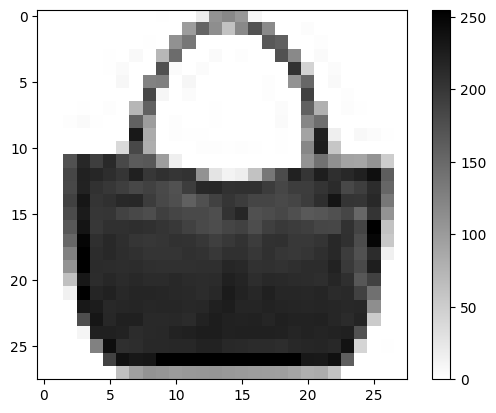

분류: 8


In [ ]:
plt.figure()
plt.imshow(X_train[100,:,:], cmap=plt.cm.binary) # 101번째 이미지
plt.colorbar()
plt.grid(False)
plt.show()
print("분류:", Y_train[100])

In [ ]:
X_train[100,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184,   9,   0,   4,   0,
          0,   0,   0,   0,   2,   0,   0, 190,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   2,   0,  73, 158,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   4,   0, 157,  79,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   2,   5,   1,   0,   0, 157,  98,   0,   2,   0,   0,
          1,   0,   0,   0,   0,   5,   0, 121, 145,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 231,  84,   0,   2,   1,   1,
          0,   0,   0,   0,   0,   1,   0,  92, 223,  16,   0,   7,   4,
          1,   0],
       [  0,   0,   0,   0,   0,   0,  38, 183,  81,   0,   0,   0,   2,
          2,   1,   2,   1,   0,   1,   0, 120, 226,  57,   0,   0,   0,
          0,   0],
       [  0,   0, 173, 216, 193, 213, 183, 164, 167,  98,  16,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 107, 141, 111,  91,  90, 108,
         50,   0],
       [  0,   0, 185, 221, 217, 210, 202, 222, 200, 206, 202, 204, 109,
         27,  12,  17,  61, 136, 180, 221, 202, 225, 208, 214, 223, 240,
        162,   0],
       [  0,   0, 183, 220, 205, 200, 193, 184, 189, 182, 173, 194, 215,
        216, 205, 207, 207, 195, 185, 194, 194, 203, 212, 183, 193, 211,
        153,   0],
       [  0,   0, 190, 233, 203, 206, 214, 216, 195, 183, 176, 159, 175,
        189, 202, 195, 186, 186, 182, 186, 195, 209, 235, 203, 202, 215,
        136,   0],
       [  0,   0, 180, 228, 201, 202, 188, 183, 178, 192, 186, 181, 181,
        177, 204, 217, 175, 179, 184, 176, 166, 169, 175, 185, 152, 203,
        107,   0],
       [  0,   0, 167, 235, 200, 207, 207, 209, 207, 203, 198, 189, 182,
        178, 186, 189, 178, 192, 197, 195, 192, 185, 184, 205, 187, 255,
         61,   0],
       [  0,   0, 152, 250, 208, 214, 209, 202, 200, 202, 205, 204, 200,
        192, 198, 204, 195, 205, 206, 198, 199, 203, 214, 207, 179, 249,
         55,   0],
       [  0,   0, 126, 255, 211, 215, 210, 206, 203, 203, 203, 206, 204,
        199, 206, 207, 200, 206, 201, 199, 202, 208, 215, 195, 174, 211,
         15,   0],
       [  0,   0, 107, 255, 212, 211, 210, 211, 208, 206, 206, 207, 208,
        208, 217, 214, 205, 206, 204, 208, 211, 211, 220, 197, 182, 225,
          0,   0],
       [  0,   0,  63, 232, 211, 216, 212, 214, 212, 212, 214, 212, 211,
        212, 223, 219, 210, 214, 213, 212, 211, 209, 217, 208, 168, 190,
          0,   0],
       [  0,   0,  14, 255, 218, 221, 215, 218, 218, 217, 215, 213, 211,
        215, 228, 220, 216, 222, 217, 217, 216, 218, 212, 213, 189, 143,
          0,   0],
       [  0,   0,   0, 230, 227, 214, 217, 218, 216, 217, 217, 214, 216,
        222, 226, 218, 218, 220, 219, 218, 217, 218, 217, 215, 216, 113,
          0,   0],
       [  0,   0,   0, 177, 233, 216, 223, 222, 213, 213, 215, 212, 220,
        226, 221, 220, 221, 218, 222, 220, 220, 221, 217, 212, 219,  52,
          0,   0],
       [  0,   0,   0,  10, 223, 222, 22

* 전처리
  * 입력변수 X는 (28, 28) 에서 (28, 28, 1) 로 차원 변경 (다층퍼셉트론 때와 다름에 주의!, 3번째는 채널(흑백이미지는 1))
  *출력변수 Y는 원-핫 인코딩

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("학습데이터 X와 Y의 차원", X_train.shape, Y_train.shape)
print("시험데이터 X와 Y의 차원", X_test.shape, Y_test.shape)

학습데이터 X와 Y의 차원 (60000, 28, 28, 1) (60000, 10)
시험데이터 X와 Y의 차원 (10000, 28, 28, 1) (10000, 10)


* 합성곱 신경망 (CNN; Convolutional Neural Network) 적용


In [ ]:
model = Sequential()
# 합성곱 레이어 1, 필터(커널)사이즈 3*3(28*28에 적용), 필터개수 16개, 제로패딩(padding='same'은 자동으로 제로패딩 설정)
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=[28,28,1]))
# 풀링 레이어 1, 스트라이드는 자동으로 설정됨
model.add(MaxPooling2D(pool_size=(2,2)))
# 합성곱 레이어 2, 필터(커널)사이즈 3*3, 필터개수 32개, 제로패딩
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')) ## (3*3*16+1)*32
# 풀링 레이어 2
model.add(MaxPooling2D(pool_size=(2,2)))
# 플래튼
model.add(Flatten())
# 드롭아웃
model.add(Dropout(rate=0.3))
# 완전연결 레이어 1
model.add(Dense(units=64, activation='relu')) ## 1568*64+64
# 드롭아웃
model.add(Dropout(rate=0.3))
# 완전연결 레이어 2 (출력 레이어)
model.add(Dense(units=10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,866 (413.54 KB)

 Trainable params: 105,866 (413.54 KB)

 Non-trainable params: 0 (0.00 B)

* 학습 조건 설정 및 학습하기
  * adam 최적화 방법 사용
  * 분류를 하므로 MSE가 아닌 교차엔트로피를 최소화 함
  * 분류의 정확도(accuracy)를 같이 보여줌

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_split=0.25)
# 25%가 검증데이터로 사용(45000개의 학습데이터, 15000개의 검정데이터)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.4776 - loss: 7.1564 - val_accuracy: 0.7803 - val_loss: 0.5626
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.7448 - loss: 0.6748 - val_accuracy: 0.8413 - val_loss: 0.4199
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8004 - loss: 0.5390 - val_accuracy: 0.8641 - val_loss: 0.3715
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.8253 - loss: 0.4791 - val_accuracy: 0.8711 - val_loss: 0.3474
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8362 - loss: 0.4418 - val_accuracy: 0.8731 - val_loss: 0.3432
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.8436 - loss: 0.4214 - val_accuracy: 0.8757 - val_loss: 0.3220
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.8512 - loss: 0.3985 - val_accuracy: 0.8854 - val_loss: 0.3063
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.8599 - loss: 0

In [ ]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9096 - loss: 0.3151


[0.29972073435783386, 0.9107000231742859]

* 시험데이터를 이용한 모형평가
  * 학습데이터 평균교차엔트로피 0.1460, 정확도 94.21%
  * 검증데이터 평균교차엔트로피 0.2593, 정확도 91.82%
  * 시험데이터 평균교차엔트로피 0.3151, 정확도 90.96%

* 에폭별 비용함수(교차엔트로피)값의 변화

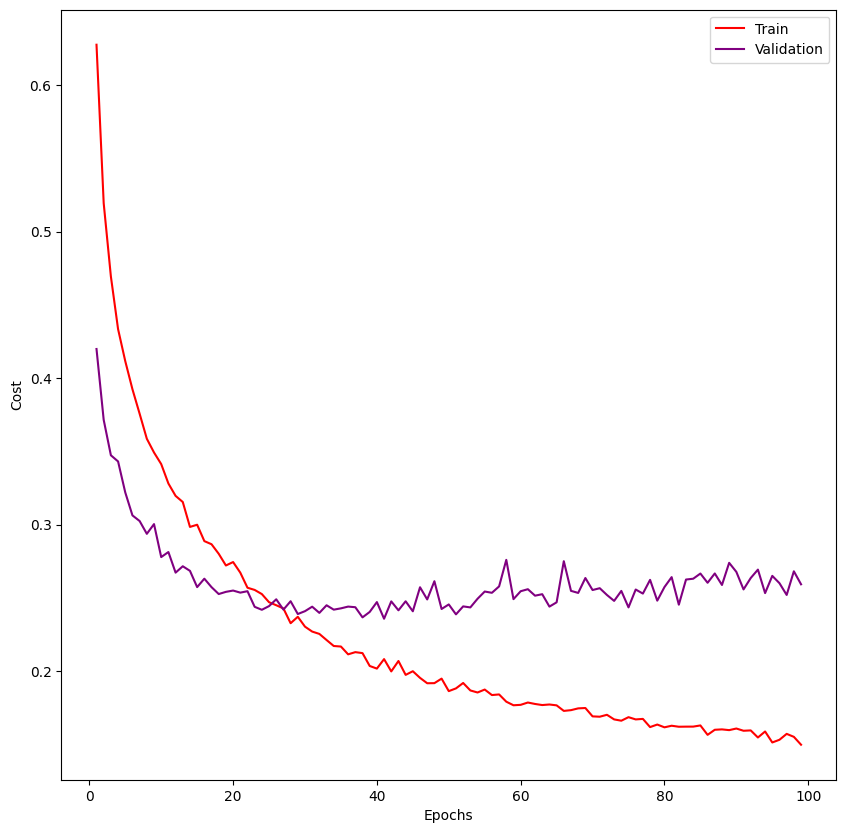

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,100), history.history['loss'][1:], label='Train', color='red')          # epoch 2부터
plt.plot(range(1,100), history.history['val_loss'][1:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

> 과적합 발생
  * Train 데이터에서는 epoch이 진행될수록 지속적으로 감소하는 추세이며 이는 모델이 훈련데이터에 대해 잘 학습하고 있음을 보여줌
  * 검증데이터에서는 초기에는 훈련데이터와 함께 감소하다가 약 30~40 epoch를 기점으로 감소세가둔화되거나 멈추며 그 이후로는 오히려 약간 증가하거나 일정수준에서 진동하하며 유지함
  * 훈련데이터에서의 손실은 계속 감소하는 것에 비해 검증데이터에서의 손실은 더이상 감소하지 않거나 증가하는 현상은 모델의 훈련데이터의 특징뿐만 아니라 노이즈까지 과도하게 학습하여 새로운 데이터에 대한 일반화 능력이 떨어지고 있음을 의미함


* 분류의 예측 (시험데이터의 처음 10개 이미지만)

In [ ]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_test_pred[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
model.predict(X_test[0:2,:,:,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[9.0624716e-25, 4.5809508e-24, 2.0748831e-28, 2.2933359e-18,
        2.0201409e-36, 1.5965280e-09, 1.0055119e-22, 4.8030989e-07,
        5.1916559e-29, 9.9999952e-01],
       [2.4678379e-09, 1.7738137e-22, 1.0000000e+00, 4.8272410e-13,
        1.0520278e-09, 0.0000000e+00, 4.3607855e-08, 0.0000000e+00,
        2.1222368e-10, 0.0000000e+00]], dtype=float32)

* 첫번째 경우, 마지막을 제외하고는 모두 0에 가까운 값, 따라서 마지막 범주로 예측
* 두번째 경우, 3번째 범주로 예측

In [ ]:
np.argmax(model.predict(X_test[0:2,:,:,:]), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([9, 2])

* 첫번째 시험데이터 이미지는 9번(10번째) 범주인 발목부츠로 예측
* 두번째 시험데이터 이미지는 2번(3번째) 범주인 스웨터로 예측